#Movie Recommendation System

You will be using the following Python libraries
* Pandas
* NumPy
* Matplotlib
* Seaborn

What would you learn?
* How to unzip a simple folder into collab
* Implementation of Demographic Filtering recommendation (Easy)
* Merging dataframes
* Basic EDA functions: shape, columns, describe, head
* Copy dataframes
* Implementation of Content Based Filtering (Moderate)

In [2]:
# To unzip a folder into collab
!unzip /content/TMDB5000Dataset.zip

Archive:  /content/TMDB5000Dataset.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [4]:
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/tmdb_5000_credits.csv')
df2=pd.read_csv('/content/tmdb_5000_movies.csv')

In [25]:
df1.columns
# df1.shape
# df1.describe()

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [24]:
df2.columns
# df2.shape
# df2.head()

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [26]:
copydf2 = df2.copy()

In [27]:
copydf2.shape

(4803, 20)

In [30]:
df1.columns = ['id','tittle','cast','crew']
copydf2= copydf2.merge(df1,on='id')

In [32]:
copydf2.shape
copydf2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [34]:
df1.columns

Index(['id', 'tittle', 'cast', 'crew'], dtype='object')

In [33]:
df1.columns

Index(['id', 'tittle', 'cast', 'crew'], dtype='object')

#Demographic Filtering

###For demographic calculation we got to use a formula i.e:

* Weighted Rating ((WR): v/(v+m) * R) + (m/(v+m) * C)

where,

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [37]:
C= copydf2['vote_average'].mean()
C

6.092171559442016

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [38]:
m= copydf2['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, we can filter out the movies that qualify for the chart

In [39]:
q_movies = copydf2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [40]:
q_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [41]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [42]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [43]:
q_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew', 'score'],
      dtype='object')

In [45]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

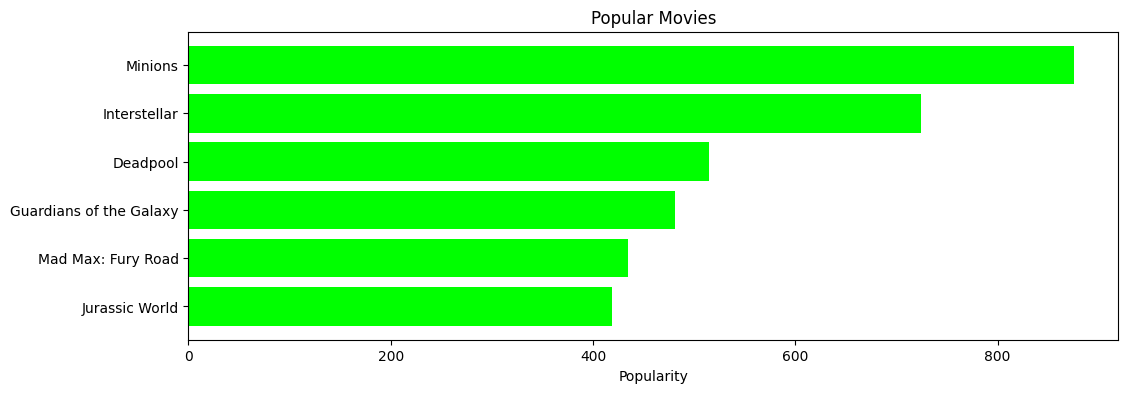

In [48]:
pop= copydf2.sort_values('popularity', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='lime')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system- Content Basesd Filtering.

#Content Based Filtering